# YOLOv8三角板关键点模型部署

模型终端部署：转ONNX格式， ONNX Runtime推理框架部署

## 环境配置

In [3]:
# YOLOv8

!pip install ultralytics --upgrade -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.9/608.9 kB 2.2 MB/s eta 0:00:00


In [4]:
# 第三方库

!pip install numpy opencv-python pillow pandas matplotlib seaborn tqdm onnx -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 31.3 MB/s eta 0:00:00


In [5]:
# ONNX Runtime

!pip install onnxruntime-gpu -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 12.5 MB/s eta 0:00:00


## 下载测试样例

In [6]:
# 图片

# !wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_1.jpg -P images
# !wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_2.jpg -P images
# !wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_3.jpg -P images
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_4.jpg -P images

--2023-08-28 11:25:29--  https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/test_img/triangle_4.jpg
Resolving zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1037930 (1014K) [image/jpeg]
Saving to: ‘images/triangle_4.jpg’

triangle_4.jpg      100%[===================>]   1014K  2.46MB/s    in 0.4s    

2023-08-28 11:25:30 (2.46 MB/s) - ‘images/triangle_4.jpg’ saved [1037930/1037930]



In [7]:
# 视频

# !wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/videos/triangle_6.mp4 -P videos
!wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/videos/triangle_7.mp4 -P videos
# !wget https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/videos/triangle_9.mp4 -P videos

--2023-08-28 11:25:30--  https://zihao-openmmlab.obs.myhuaweicloud.com/20220610-mmpose/triangle_dataset/videos/triangle_7.mp4
Resolving zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.myhuaweicloud.com (zihao-openmmlab.obs.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3358088 (3.2M) [video/mp4]
Saving to: ‘videos/triangle_7.mp4’

triangle_7.mp4      100%[===================>]   3.20M  5.42MB/s    in 0.6s    

2023-08-28 11:25:31 (5.42 MB/s) - ‘videos/triangle_7.mp4’ saved [3358088/3358088]



In [8]:
# 模型权重文件

# # yolov8n-pose 预训练模型微调
!wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/checkpoint/Triangle_215_yolov8n_pretrain.pt -P checkpoint

# # yolov8s-pose 预训练模型微调
# !wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/checkpoint/Triangle_215_yolov8s_pretrain.pt -P checkpoint

# yolov8m-pose 预训练模型微调
# !wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/checkpoint/Triangle_215_yolov8m_pretrain.pt -P checkpoint

# # yolov8l-pose 预训练模型微调
!wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/checkpoint/Triangle_215_yolov8l_pretrain.pt -P checkpoint

# # yolov8x-pose 预训练模型微调
# !wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/checkpoint/Triangle_215_yolov8x_pretrain.pt -P checkpoint

# yolov8x-pose-p6 预训练模型微调
# !wget https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/checkpoint/Triangle_215_yolov8x_p6_pretrain.pt -P checkpoint


--2023-08-28 11:25:31--  https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/checkpoint/Triangle_215_yolov8n_pretrain.pt
Resolving zihao-download.obs.cn-east-3.myhuaweicloud.com (zihao-download.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.162, 121.36.235.163
Connecting to zihao-download.obs.cn-east-3.myhuaweicloud.com (zihao-download.obs.cn-east-3.myhuaweicloud.com)|121.36.235.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6405855 (6.1M) [binary/octet-stream]
Saving to: ‘checkpoint/Triangle_215_yolov8n_pretrain.pt’

Triangle_215_yolov8 100%[===================>]   6.11M  10.6MB/s    in 0.6s    

2023-08-28 11:25:32 (10.6 MB/s) - ‘checkpoint/Triangle_215_yolov8n_pretrain.pt’ saved [6405855/6405855]

--2023-08-28 11:25:32--  https://zihao-download.obs.cn-east-3.myhuaweicloud.com/yolov8/datasets/Triangle_215_Dataset/checkpoint/Triangle_215_yolov8l_pretrain.pt
Resolving zihao-download.obs.cn-east-3.myhuaweicloud.com (

## Pytorch文件转为ONNX文件

In [9]:
from ultralytics import YOLO

# 载入pytorch模型
model = YOLO('checkpoint/Triangle_215_yolov8l_pretrain.pt')

# 导出模型
model.export(format='onnx')

Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
YOLOv8l-pose summary (fused): 287 layers, 44457390 parameters, 0 gradients

PyTorch: starting from 'checkpoint/Triangle_215_yolov8l_pretrain.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 14, 8400) (85.2 MB)

ONNX: starting export with onnx 1.14.1 opset 17...


============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



ONNX: export success ✅ 10.4s, saved as 'checkpoint/Triangle_215_yolov8l_pretrain.onnx' (169.9 MB)

Export complete (23.6s)
Results saved to /content/checkpoint
Predict:         yolo predict task=pose model=checkpoint/Triangle_215_yolov8l_pretrain.onnx imgsz=640 
Validate:        yolo val task=pose model=checkpoint/Triangle_215_yolov8l_pretrain.onnx imgsz=640 data=Triangle_215.yaml 
Visualize:       https://netron.app


'checkpoint/Triangle_215_yolov8l_pretrain.onnx'

## ONNX 预测---命令行

In [10]:
# 单张图像

!yolo predict pose model=checkpoint/Triangle_215_yolov8l_pretrain.onnx source=images/triangle_4.jpg

Ultralytics YOLOv8.0.164 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Loading checkpoint/Triangle_215_yolov8l_pretrain.onnx for ONNX Runtime inference...

image 1/1 /content/images/triangle_4.jpg: 640x640 3 sjb_rects, 3489.6ms
Speed: 14.2ms preprocess, 3489.6ms inference, 21.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/pose/predict


In [11]:
# 视频

#!yolo predict pose model=checkpoint/Triangle_215_yolov8l_pretrain.onnx source=videos/triangle_7.mp4

In [12]:
# 摄像头

#!yolo predict pose model=checkpoint/Triangle_215_yolov8l_pretrain.onnx source=0 show verbose=False

##  ONNX Runtime推理预测-单张图像


### 库

In [1]:
import cv2
import numpy as np
from PIL import Image

import onnxruntime

import torch
# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
kpts_shape = [3, 3] # 关键点 shape

### 创建ONNX Runtime的InferenceSession

In [3]:
ort_session = onnxruntime.InferenceSession('checkpoint/Triangle_215_yolov8l_pretrain.onnx', providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])

### 模拟测试

In [4]:
# ONNX Runtime的InferenceSession 的输入只能为640 * 640 的张量，因此构造一个随机张量进行模拟测试

import torch
x = torch.randn(1, 3, 640, 640).numpy()

In [5]:
x.shape

(1, 3, 640, 640)

In [6]:
ort_inputs = {'images': x}
ort_output = ort_session.run(['output0'], ort_inputs)[0]

In [7]:
ort_output.shape

(1, 14, 8400)

## ONNX模型的输入

In [8]:
model_input = ort_session.get_inputs()
input_name = [model_input[0].name]

In [9]:
input_name

['images']

In [10]:
input_shape = model_input[0].shape

In [11]:
input_shape

[1, 3, 640, 640]

In [12]:
input_height, input_width = input_shape[2:]

## ONNX模型的输出

In [13]:
model_output = ort_session.get_outputs()
output_name = [model_output[0].name]

In [14]:
output_name

['output0']

In [15]:
output_shape = model_output[0].shape

In [16]:
output_shape

[1, 14, 8400]

### 加载图像并进行预处理

In [17]:
img_path = '/content/images/triangle_4.jpg'

In [18]:
# 导入 BGR 格式的图像

img_bgr = cv2.imread(img_path)

In [19]:
type(img_bgr)

numpy.ndarray

In [20]:
img_bgr

array([[[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       [[140, 140, 140],
        [140, 140, 140],
        [140, 140, 140],
        ...,
        [ 94,  94,  94],
        [ 94,  94,  94],
        [ 94,  94,  94]],

       ...,

       [[119, 119, 119],
        [119, 119, 119],
        [119, 119, 119],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[118, 118, 118],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]],

       [[118, 118, 118],
        [118, 118, 118],
        [118, 118, 118],
        ...,
        [ 76,  76,  76],
        [ 76,  76,  76],
        [ 76,  76,  76]]

In [21]:
# 预处理-缩放图像尺寸

img_bgr_640 = cv2.resize(img_bgr, [input_height, input_width])

In [22]:
img_rgb_640 = img_bgr_640[:,:,::-1]

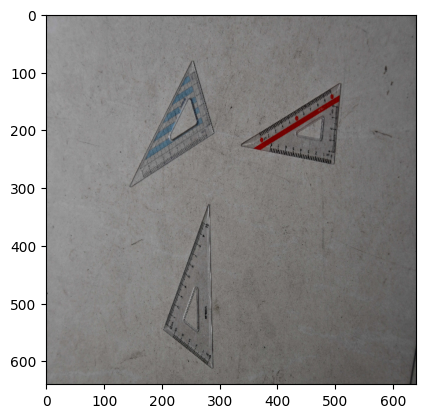

In [23]:
plt.imshow(img_rgb_640)
plt.show()

In [24]:
# X 方向 图像缩放比例
x_ratio = img_bgr.shape[1] / input_width

# Y 方向 图像缩放比例
y_ratio = img_bgr.shape[0] / input_height

In [25]:
# 预处理-归一化

input_tensor = img_rgb_640 / 255

# 预处理-构造输入 Tensor

input_tensor = np.expand_dims(input_tensor, axis=0) # 加 batch 维度
input_tensor = input_tensor.transpose((0, 3, 1, 2)) # N, C, H, W
input_tensor = np.ascontiguousarray(input_tensor)   # 将内存不连续存储的数组，转换为内存连续存储的数组，使得内存访问速度更快
input_tensor = torch.from_numpy(input_tensor).to(device).float() # 转 Pytorch Tensor
# input_tensor = input_tensor.half() # 是否开启半精度，即 uint8 转 fp16，默认转 fp32

In [26]:
input_tensor.shape

torch.Size([1, 3, 640, 640])

### 预测

In [27]:
# ONNX Runtime 推理预测


ort_output = ort_session.run(output_name, {input_name[0]: input_tensor.cpu().numpy()})[0]

# 转 Tensor
preds = torch.Tensor(ort_output)

preds

tensor([[[ 7.9940e+00,  1.4532e+01,  2.2442e+01,  ...,  5.5700e+02,
           5.8641e+02,  6.2064e+02],
         [ 1.7604e+01,  1.9624e+01,  1.7322e+01,  ...,  5.9197e+02,
           5.8591e+02,  5.9102e+02],
         [ 2.0912e+01,  3.6573e+01,  5.7994e+01,  ...,  3.2691e+02,
           3.2294e+02,  3.8140e+02],
         ...,
         [ 1.1192e+01,  2.1130e+01,  2.9305e+01,  ...,  5.2279e+02,
           5.5045e+02,  5.8428e+02],
         [-6.7590e-01,  2.8374e+00,  1.7738e+00,  ...,  6.2586e+02,
           6.3238e+02,  6.4487e+02],
         [ 3.4383e-01,  2.5818e-01,  2.8097e-01,  ...,  4.4833e-01,
           4.7993e-01,  4.6511e-01]]])

### 置信度过滤与极大值抑制过滤

置信度过滤：在目标检测中，每个预测边界框都会伴随一个置信度分数，表示该边界框中包含目标的置信程度。通过设置置信度阈值，可以对置信度较低的边界框进行过滤，只保留置信度高于阈值的边界框。这样可以排除一些不太可靠的检测结果，提高检测的准确性。


极大值抑制过滤：YOLOv8算法在每个网格单元中预测多个边界框，这可能导致多个边界框重叠并预测同一个目标。为了消除冗余的边界框，需要使用极大值抑制来选择最佳的边界框。极大值抑制通过计算边界框之间的重叠度（通常使用IoU）来评估它们的相似性，并剔除重叠度高于一定阈值的边界框。这样可以确保每个目标只被选择出最具代表性的边界框，避免重复检测和冗余输出。

In [28]:
from ultralytics.yolo.utils import ops

WARNING ⚠️ 'ultralytics.yolo.v8' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.models.yolo' instead.
WARNING ⚠️ 'ultralytics.yolo.utils' is deprecated since '8.0.136' and will be removed in '8.1.0'. Please use 'ultralytics.utils' instead.
Note this warning may be related to loading older models. You can update your model to current structure with:
    import torch
    ckpt = torch.load("model.pt")  # applies to both official and custom models
    torch.save(ckpt, "updated-model.pt")



In [29]:
preds = ops.non_max_suppression(preds, conf_thres=0.25, iou_thres=0.7, nc=1)

In [47]:
preds

[tensor([[2.9020e+03, 6.6311e+02, 4.4443e+03, 1.5365e+03, 9.6444e-01, 0.0000e+00, 3.0341e+03, 1.2688e+03, 5.6788e-01, 4.4126e+03, 7.2006e+02, 9.8592e-01, 4.3810e+03, 1.5232e+03, 9.9032e-01],
         [1.2283e+03, 4.4623e+02, 2.5629e+03, 1.7462e+03, 9.6182e-01, 0.0000e+00, 1.2754e+03, 1.6625e+03, 9.5216e-01, 1.9457e+03, 5.9195e+02, 9.2921e-01, 2.5903e+03, 1.1766e+03, 9.6880e-01],
         [1.7392e+03, 1.9014e+03, 2.5463e+03, 3.5717e+03, 9.2235e-01, 0.0000e+00, 2.4878e+03, 1.9875e+03, 9.9767e-01, 2.3909e+03, 3.5102e+03, 6.0868e-01, 1.8031e+03, 3.1843e+03, 8.8774e-01]])]

In [58]:
# 为什么这样取？暂时无法理解

pred = preds[0]

In [59]:
pred.shape

torch.Size([3, 15])

In [60]:
pred

tensor([[2.9020e+03, 6.6311e+02, 4.4443e+03, 1.5365e+03, 9.6444e-01, 0.0000e+00, 3.0341e+03, 1.2688e+03, 5.6788e-01, 4.4126e+03, 7.2006e+02, 9.8592e-01, 4.3810e+03, 1.5232e+03, 9.9032e-01],
        [1.2283e+03, 4.4623e+02, 2.5629e+03, 1.7462e+03, 9.6182e-01, 0.0000e+00, 1.2754e+03, 1.6625e+03, 9.5216e-01, 1.9457e+03, 5.9195e+02, 9.2921e-01, 2.5903e+03, 1.1766e+03, 9.6880e-01],
        [1.7392e+03, 1.9014e+03, 2.5463e+03, 3.5717e+03, 9.2235e-01, 0.0000e+00, 2.4878e+03, 1.9875e+03, 9.9767e-01, 2.3909e+03, 3.5102e+03, 6.0868e-01, 1.8031e+03, 3.1843e+03, 8.8774e-01]])

### 框

In [61]:
pred_det = pred[:, :6].cpu().numpy()

In [62]:
# 目标检测预测结果：左上角X、左上角Y、右下角X、右下角Y、置信度、类别ID

pred_det

array([[       2902,      663.11,      4444.3,      1536.5,     0.96444,           0],
       [     1228.3,      446.23,      2562.9,      1746.2,     0.96182,           0],
       [     1739.2,      1901.4,      2546.3,      3571.7,     0.92235,           0]], dtype=float32)

In [63]:
num_bbox = len(pred_det)
print('预测出 {} 个框'.format(num_bbox))

预测出 3 个框


In [64]:
# 类别

bboxes_cls = pred_det[:, 5]
bboxes_cls

array([          0,           0,           0], dtype=float32)

In [65]:
# 置信度

bboxes_conf = pred_det[:, 4]
bboxes_conf

array([    0.96444,     0.96182,     0.92235], dtype=float32)

In [66]:
# 目标检测框 XYXY 坐标
# 还原为缩放之前原图上的坐标

pred_det[:, 0] = pred_det[:, 0] * x_ratio
pred_det[:, 1] = pred_det[:, 1] * y_ratio
pred_det[:, 2] = pred_det[:, 2] * x_ratio
pred_det[:, 3] = pred_det[:, 3] * y_ratio
bboxes_xyxy = pred_det[:, :4].astype('uint32')
bboxes_xyxy

array([[25247,  3846, 38665,  8911],
       [10686,  2588, 22296, 10128],
       [15131, 11028, 22152, 20715]], dtype=uint32)

### 关键点

In [67]:
pred_kpts = pred[:, 6:].view(len(pred), kpts_shape[0], kpts_shape[1])

In [68]:
pred_kpts.shape

torch.Size([3, 3, 3])

In [69]:
bboxes_keypoints = pred_kpts.cpu().numpy()
bboxes_keypoints

array([[[     3034.1,      1268.8,     0.56788],
        [     4412.6,      720.06,     0.98592],
        [       4381,      1523.2,     0.99032]],

       [[     1275.4,      1662.5,     0.95216],
        [     1945.7,      591.95,     0.92921],
        [     2590.3,      1176.6,      0.9688]],

       [[     2487.8,      1987.5,     0.99767],
        [     2390.9,      3510.2,     0.60868],
        [     1803.1,      3184.3,     0.88774]]], dtype=float32)

In [70]:
# 还原为缩放之前原图上的坐标

bboxes_keypoints[:,:,0] = bboxes_keypoints[:,:,0] * x_ratio
bboxes_keypoints[:,:,1] = bboxes_keypoints[:,:,1] * y_ratio
bboxes_keypoints = bboxes_keypoints.astype('uint32')
bboxes_keypoints

array([[[26396,  7359,     0],
        [38389,  4176,     0],
        [38114,  8834,     0]],

       [[11095,  9642,     0],
        [16927,  3433,     0],
        [22536,  6824,     0]],

       [[21643, 11527,     0],
        [20800, 20359,     0],
        [15686, 18468,     0]]], dtype=uint32)

### 可视化配置

In [71]:
# 框可视化配置

bbox_color = (150, 0, 0)             # 框的 BGR 颜色
bbox_thickness = 6                   # 框的线宽

# 框类别文字
bbox_labelstr = {
    'font_size':4,         # 字体大小
    'font_thickness':10,   # 字体粗细
    'offset_x':0,          # X 方向，文字偏移距离，向右为正
    'offset_y':-80,        # Y 方向，文字偏移距离，向下为正
}

In [72]:
# 关键点 BGR 配色
kpt_color_map = {
    0:{'name':'angle_30', 'color':[255, 0, 0], 'radius':40},      # 30度角点
    1:{'name':'angle_60', 'color':[0, 255, 0], 'radius':40},      # 60度角点
    2:{'name':'angle_90', 'color':[0, 0, 255], 'radius':40},      # 90度角点
}

# 点类别文字
kpt_labelstr = {
    'font_size':4,             # 字体大小
    'font_thickness':10,       # 字体粗细
    'offset_x':30,             # X 方向，文字偏移距离，向右为正
    'offset_y':120,            # Y 方向，文字偏移距离，向下为正
}

# 骨架连接 BGR 配色
skeleton_map = [
    {'srt_kpt_id':0, 'dst_kpt_id':1, 'color':[196, 75, 255], 'thickness':3},        # 30度角点-60度角点
    {'srt_kpt_id':0, 'dst_kpt_id':2, 'color':[180, 187, 28], 'thickness':3},        # 30度角点-90度角点
    {'srt_kpt_id':1, 'dst_kpt_id':2, 'color':[47,255, 173], 'thickness':3},         # 60度角点-90度角点
]

In [73]:
for idx in range(num_bbox): # 遍历每个框

    # 获取该框坐标
    bbox_xyxy = bboxes_xyxy[idx]

    # 获取框的预测类别（对于关键点检测，只有一个类别）
    bbox_label = 'sjb_rect'

    # 画框
    img_bgr = cv2.rectangle(img_bgr, (bbox_xyxy[0], bbox_xyxy[1]), (bbox_xyxy[2], bbox_xyxy[3]), bbox_color, bbox_thickness)

    # 写框类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
    img_bgr = cv2.putText(img_bgr, bbox_label, (bbox_xyxy[0]+bbox_labelstr['offset_x'], bbox_xyxy[1]+bbox_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, bbox_labelstr['font_size'], bbox_color, bbox_labelstr['font_thickness'])

    bbox_keypoints = bboxes_keypoints[idx] # 该框所有关键点坐标和置信度

    # 画该框的骨架连接
    for skeleton in skeleton_map:

        # 获取起始点坐标
        srt_kpt_id = skeleton['srt_kpt_id']
        srt_kpt_x = bbox_keypoints[srt_kpt_id][0]
        srt_kpt_y = bbox_keypoints[srt_kpt_id][1]

        # 获取终止点坐标
        dst_kpt_id = skeleton['dst_kpt_id']
        dst_kpt_x = bbox_keypoints[dst_kpt_id][0]
        dst_kpt_y = bbox_keypoints[dst_kpt_id][1]

        # 获取骨架连接颜色
        skeleton_color = skeleton['color']

        # 获取骨架连接线宽
        skeleton_thickness = skeleton['thickness']

        # 画骨架连接
        img_bgr = cv2.line(img_bgr, (srt_kpt_x, srt_kpt_y),(dst_kpt_x, dst_kpt_y),color=skeleton_color,thickness=skeleton_thickness)

    # 画该框的关键点
    for kpt_id in kpt_color_map:

        # 获取该关键点的颜色、半径、XY坐标
        kpt_color = kpt_color_map[kpt_id]['color']
        kpt_radius = kpt_color_map[kpt_id]['radius']
        kpt_x = bbox_keypoints[kpt_id][0]
        kpt_y = bbox_keypoints[kpt_id][1]

        # 画圆：图片、XY坐标、半径、颜色、线宽（-1为填充）
        img_bgr = cv2.circle(img_bgr, (kpt_x, kpt_y), kpt_radius, kpt_color, -1)

        # 写关键点类别文字：图片，文字字符串，文字左上角坐标，字体，字体大小，颜色，字体粗细
        # kpt_label = str(kpt_id) # 写关键点类别 ID
        kpt_label = str(kpt_color_map[kpt_id]['name']) # 写关键点类别名称
        img_bgr = cv2.putText(img_bgr, kpt_label, (kpt_x+kpt_labelstr['offset_x'], kpt_y+kpt_labelstr['offset_y']), cv2.FONT_HERSHEY_SIMPLEX, kpt_labelstr['font_size'], kpt_color, kpt_labelstr['font_thickness'])

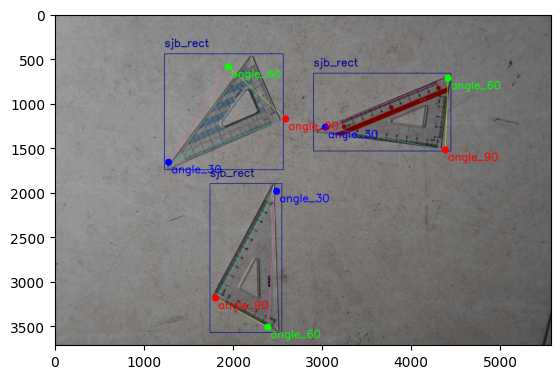

In [74]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()